### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Boosted tree models on a simulated dataset

- [AdaBoostClassifier documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn-ensemble-adaboostclassifier)
- [XGBClassifier documentation](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier)
- [LGBMClassifier documentation](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html#lightgbm-lgbmclassifier)
- [GridSeachCV documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)


- [Data](https://github.com/donlapark/ds352-labs/raw/main/Lab06-data.zip)


Perform GridSearchCV of the following three models on the provided training set (`X_train.csv` and `y_train.csv`)

1. Evaluate these models on the test set (`X_test.csv` and `y_test.csv`). **Keep searching (using cross-validation) until you find the model that achieves > 0.83 out-of-fold accuracy (use `GridSeachCV.best_score_` to obtain the out-of-fold accuracy)**

2. Report the test accuracy of your best model.

3. For each model, plot the feature importances

For `AdaBoostClassifier`, feature importances can be obtained by calling the `feature_importances` attribute after fitting the model.

For `XGBClassifier` and `LGBMClassifier`, feature importances can be obtained using the library’s `plot_importance` function. Here is a minimal example in XGBoost:

- AdaBoost. Grid search over `n_estimators` and `learning_rate`.
- XGBoost. Grid search over `n_estimators`, `max_depth` and `learning_rate`.
- LightGBM. Grid search over `n_estimators`, `max_depth` and `learning_rate`.

In [78]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()
ab.fit(X, y)
ab.feature_importances_

array([0.        , 0.05832968, 0.47701905, 0.46465128])

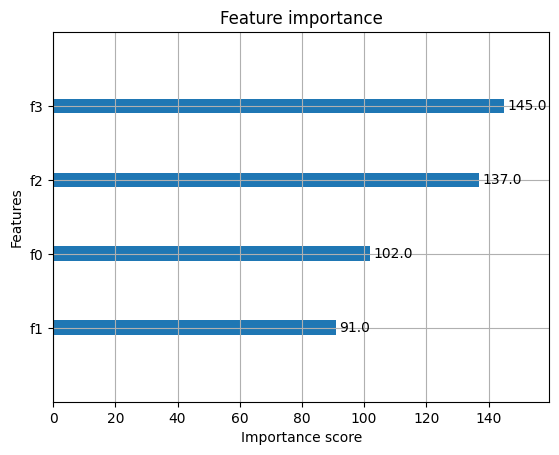

In [79]:
from xgboost import XGBClassifier, plot_importance

from sklearn import datasets


iris = datasets.load_iris()
X = iris.data
y = iris.target

model = XGBClassifier()
model.fit(X, y)
plot_importance(model);

In [80]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

/usr/local/lib/python3.12/dist-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


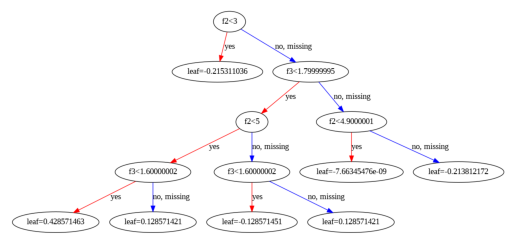

In [81]:
from xgboost import plot_tree

plot_tree(model, num_trees=1);

In [82]:
import pandas as pd

X_train = pd.read_csv('X_train.csv', header=None)


X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,39.0,0.0,2.0,94.0,199.0,0.0,1.0,179.0,0.0,0.0,2.0,0.0,2.0
1,29.0,1.0,1.0,130.0,204.0,0.0,0.0,202.0,0.0,0.0,2.0,0.0,2.0
2,50.0,0.0,2.0,120.0,219.0,0.0,1.0,158.0,0.0,1.6,1.0,0.0,2.0
3,54.0,1.0,0.0,140.0,239.0,0.0,1.0,160.0,0.0,1.2,2.0,0.0,2.0
4,38.0,1.0,2.0,138.0,175.0,0.0,1.0,173.0,0.0,0.0,2.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,50.0,1.0,2.0,140.0,233.0,0.0,1.0,163.0,0.0,0.6,1.0,1.0,3.0
208,51.0,1.0,2.0,94.0,227.0,0.0,1.0,154.0,1.0,0.0,2.0,1.0,3.0
209,69.0,1.0,3.0,160.0,234.0,1.0,0.0,131.0,0.0,0.1,1.0,1.0,2.0
210,46.0,1.0,0.0,120.0,249.0,0.0,0.0,144.0,0.0,0.8,2.0,0.0,3.0


In [83]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score
import pandas as pd, numpy as np

X_train = pd.read_csv("X_train.csv", header=None)
y_train = pd.read_csv("y_train.csv", header=None).squeeze()
X_test  = pd.read_csv("X_test.csv",  header=None)
y_test  = pd.read_csv("y_test.csv",  header=None).squeeze()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
features = [f"f{i}" for i in range(X_train.shape[1])]
X_train.columns = X_test.columns = features


In [84]:
from sklearn.ensemble import AdaBoostClassifier
gs_ada = GridSearchCV(
    AdaBoostClassifier(random_state=42),
    {"n_estimators":[50,100,200,300,500], "learning_rate":[0.01,0.05,0.1,0.5,1.0]},
    scoring="accuracy", cv=cv, n_jobs=-1
).fit(X_train, y_train)

ada = gs_ada.best_estimator_
ada_oof = gs_ada.best_score_
ada_test = accuracy_score(y_test, ada.predict(X_test))
print("AdaBoost  | OOF:", round(ada_oof,4), "| Test:", round(ada_test,4), "| Params:", gs_ada.best_params_)


AdaBoost  | OOF: 0.8539 | Test: 0.8352 | Params: {'learning_rate': 0.5, 'n_estimators': 50}


In [85]:
from xgboost import XGBClassifier, plot_importance
is_multiclass = len(np.unique(y_train)) > 2
gs_xgb = GridSearchCV(
    XGBClassifier(random_state=42, n_jobs=-1,
                  objective="multi:softmax" if is_multiclass else "binary:logistic",
                  eval_metric="mlogloss" if is_multiclass else "logloss"),
    {"n_estimators":[100,200,400], "max_depth":[3,6,8], "learning_rate":[0.01,0.05,0.1]},
    scoring="accuracy", cv=cv, n_jobs=-1
).fit(X_train, y_train)

xgb = gs_xgb.best_estimator_
xgb_oof = gs_xgb.best_score_
xgb_test = accuracy_score(y_test, xgb.predict(X_test))
print("XGBoost   | OOF:", round(xgb_oof,4), "| Test:", round(xgb_test,4), "| Params:", gs_xgb.best_params_)


XGBoost   | OOF: 0.8299 | Test: 0.8132 | Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}


In [86]:
from lightgbm import LGBMClassifier
gs_lgb = GridSearchCV(
    LGBMClassifier(random_state=42, objective="multiclass" if is_multiclass else "binary"),
    {"n_estimators":[400,800,1200], "max_depth":[-1], "learning_rate":[0.01,0.05,0.1]},
    scoring="accuracy", cv=cv, n_jobs=-1
).fit(X_train, y_train)

lgb = gs_lgb.best_estimator_
lgb_oof = gs_lgb.best_score_
lgb_test = accuracy_score(y_test, lgb.predict(X_test))
print("LightGBM  | OOF:", round(lgb_oof,4), "| Test:", round(lgb_test,4), "| Params:", gs_lgb.best_params_)


[LightGBM] [Info] Number of positive: 115, number of negative: 97
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 221
[LightGBM] [Info] Number of data points in the train set: 212, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.542453 -> initscore=0.170221
[LightGBM] [Info] Start training from score 0.170221
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

In [87]:
summary = [
    ("AdaBoost", ada_oof, ada_test, ada),
    ("XGBoost",  xgb_oof, xgb_test, xgb),
    ("LightGBM", lgb_oof, lgb_test, lgb),
]
best_name, best_oof, best_test, best_model = max(summary, key=lambda x: x[1])
print(f"Best by OOF: {best_name} | OOF={best_oof:.4f} | Test={best_test:.4f}")

Best by OOF: AdaBoost | OOF=0.8539 | Test=0.8352


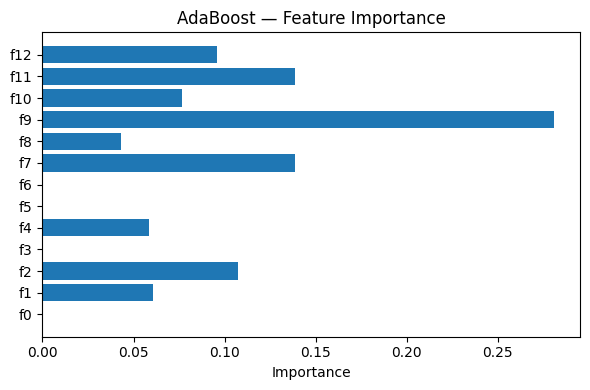

In [88]:
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt

ada = gs_ada.best_estimator_
importances = ada.feature_importances_

plt.figure(figsize=(6,4))
plt.barh(features, importances)
plt.title("AdaBoost — Feature Importance")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


<Figure size 600x400 with 0 Axes>

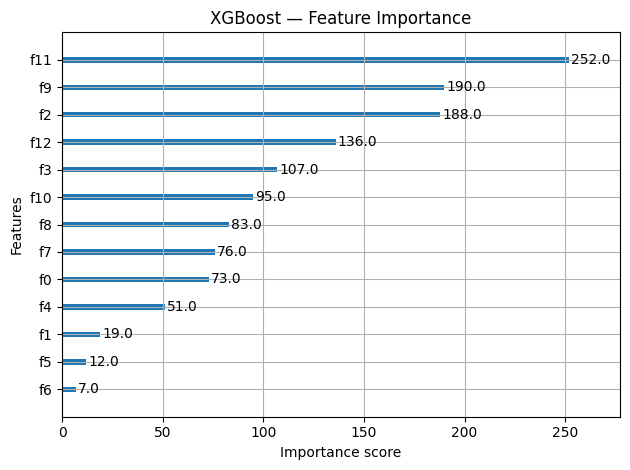

In [89]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

xgb = gs_xgb.best_estimator_

plt.figure(figsize=(6,4))
plot_importance(xgb, max_num_features=20)
plt.title("XGBoost — Feature Importance")
plt.tight_layout()
plt.show()


<Figure size 600x400 with 0 Axes>

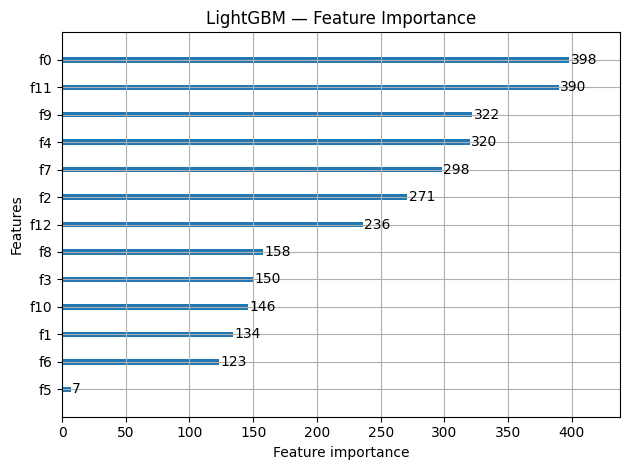

In [90]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt

lgb = gs_lgb.best_estimator_

plt.figure(figsize=(6,4))
plot_importance(lgb, max_num_features=20)
plt.title("LightGBM — Feature Importance")
plt.tight_layout()
plt.show()
